# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vadso
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | manismata
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | fort abbas
Processing Record 11 of Set 1 | niafunke
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | liuhe
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | jayapura
Processing Record 23 of Set 1 |

Processing Record 41 of Set 4 | tullamore
Processing Record 42 of Set 4 | namtsy
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | antsiranana
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | chinchilla
Processing Record 47 of Set 4 | murray bridge
Processing Record 48 of Set 4 | buchanan
Processing Record 49 of Set 4 | al qubbah
Processing Record 0 of Set 5 | dhuusamarreeb
Processing Record 1 of Set 5 | turabah
Processing Record 2 of Set 5 | masinloc
Processing Record 3 of Set 5 | zacharo
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | saskatoon
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | puerto ayora
Processing Record 10 of Set 5 | revelstoke
Processing Record 11 of Set 5 | badagry
Processing Record 12 of Set 5 | metlili chaamba
Processing Record 13 of Set 5 | itoman
Processing Record 14 of Set 5 | hawaiian p

Processing Record 32 of Set 8 | salinopolis
Processing Record 33 of Set 8 | richfield
Processing Record 34 of Set 8 | manggar
Processing Record 35 of Set 8 | katsuren-haebaru
Processing Record 36 of Set 8 | linxia chengguanzhen
Processing Record 37 of Set 8 | withernsea
Processing Record 38 of Set 8 | chimbarongo
Processing Record 39 of Set 8 | auki
Processing Record 40 of Set 8 | pitimbu
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | ambon
Processing Record 43 of Set 8 | la'ie
Processing Record 44 of Set 8 | turpan
Processing Record 45 of Set 8 | tamiahua
Processing Record 46 of Set 8 | 'ain benian
Processing Record 47 of Set 8 | saint-philippe
Processing Record 48 of Set 8 | aginskoye
Processing Record 49 of Set 8 | island harbour
Processing Record 0 of Set 9 | ust-nera
Processing Record 1 of Set 9 | hailun
Processing Record 2 of Set 9 | wenchang
Processing Record 3 of Set 9 | nueva gerona
Processing Record 4 of Set 9 | tangalle
Processing Record 5 of Set 9 |

Processing Record 22 of Set 12 | san jose village
City not found. Skipping...
Processing Record 23 of Set 12 | blair
Processing Record 24 of Set 12 | port douglas
Processing Record 25 of Set 12 | vila franca do campo
Processing Record 26 of Set 12 | n'zeto
Processing Record 27 of Set 12 | dronero
Processing Record 28 of Set 12 | vatutine
Processing Record 29 of Set 12 | acarau
Processing Record 30 of Set 12 | kabanga
Processing Record 31 of Set 12 | farshut
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vadso,70.0744,29.7487,10.49,53,0,3.60,NO,1686539768
1,tofol,5.3248,163.0078,30.88,66,75,6.69,FM,1686539731
2,taulaga,-11.0553,-171.0883,28.27,79,65,7.43,AS,1686539854
3,wailua homesteads,22.0669,-159.3780,26.44,79,75,6.69,US,1686540238
4,carnarvon,-24.8667,113.6333,17.90,47,0,8.51,AU,1686539729


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,10.49,53,0,3.60,NO,1686539768
1,tofol,5.3248,163.0078,30.88,66,75,6.69,FM,1686539731
2,taulaga,-11.0553,-171.0883,28.27,79,65,7.43,AS,1686539854
3,wailua homesteads,22.0669,-159.3780,26.44,79,75,6.69,US,1686540238
4,carnarvon,-24.8667,113.6333,17.90,47,0,8.51,AU,1686539729


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

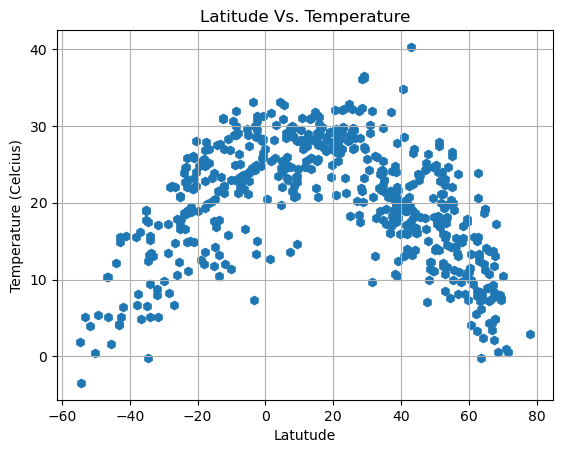

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df['Max Temp'], marker="h")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Latutude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

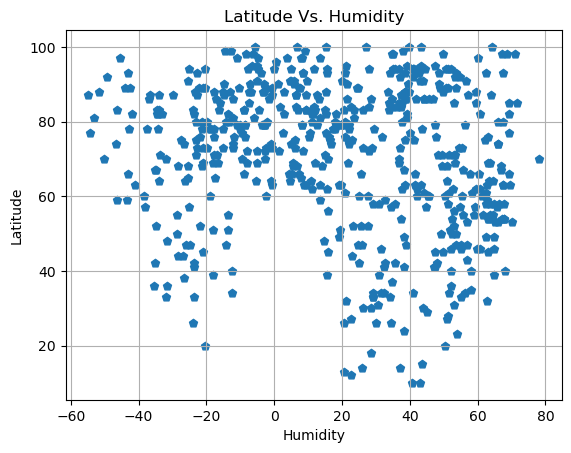

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df['Humidity'], marker="p")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

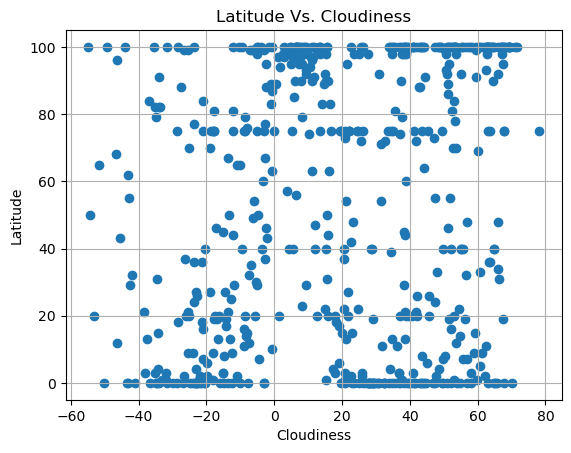

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

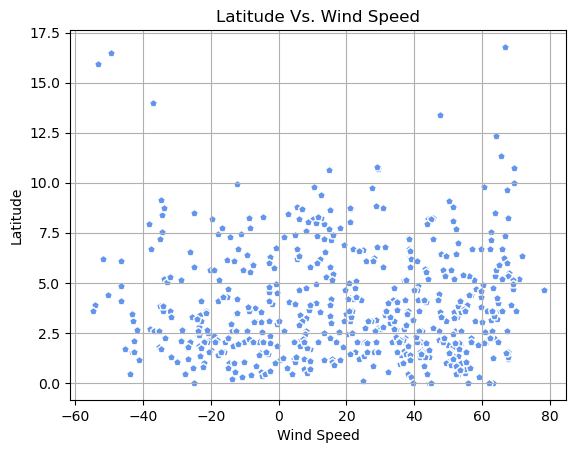

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df['Wind Speed'], color="cornflowerblue", edgecolor="white", marker="p")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y.name}")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,10.49,53,0,3.60,NO,1686539768
1,tofol,5.3248,163.0078,30.88,66,75,6.69,FM,1686539731
3,wailua homesteads,22.0669,-159.3780,26.44,79,75,6.69,US,1686540238
9,fort abbas,29.1925,72.8536,36.26,34,0,10.69,PK,1686540239
10,niafunke,15.9322,-3.9906,31.18,45,90,5.46,ML,1686540239


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,taulaga,-11.0553,-171.0883,28.27,79,65,7.43,AS,1686539854
4,carnarvon,-24.8667,113.6333,17.90,47,0,8.51,AU,1686539729
5,port-aux-francais,-49.3500,70.2167,5.40,92,100,16.48,TF,1686540238
6,manismata,-2.4667,111.0333,31.24,60,46,2.32,ID,1686540239
7,grytviken,-54.2811,-36.5092,-3.46,77,50,3.91,GS,1686540239


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7382625537593285


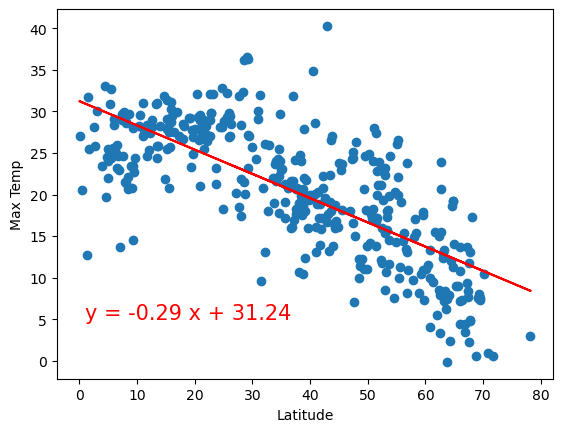

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Max Temp"]
linear_regression(x, y, ["Max Temp"], (1,5))


The r-squared is: 0.75506272126675


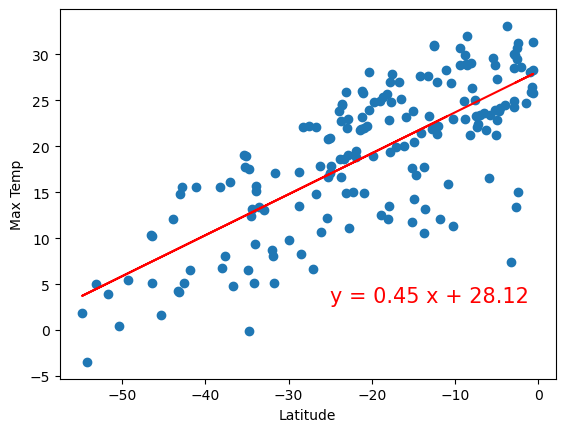

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Max Temp"]
linear_regression(x, y, 'Max Temp', (-25,3))

## Linear relationship:

In the northern hemisphere there is a strong positive correlation between latitude and temperature, where the higher the latitude, the lower the temperature.

In the southern hemisphere there is a strong negative correlation between temperature and latitude. The more negative the latitude, the lower the temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.20689207709887336


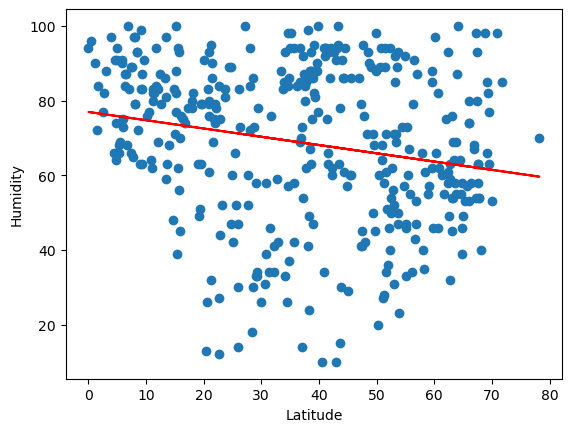

In [17]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Humidity"]
linear_regression(x, y, "Humidity", (45,5))

The r-squared is: 0.17733454645530247


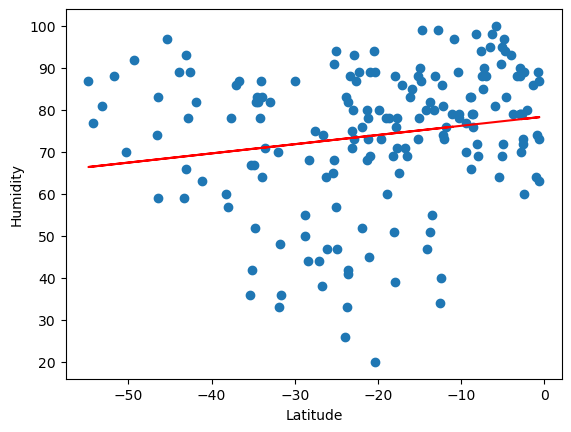

In [18]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Humidity"]
linear_regression(x, y, 'Humidity', (-50,3))

**Linear relationship:** 

There is a relatively weak negative correlation between Humidity and Latitude in the northern hemisphere where as latitude increases, humidity tends to decrease.


In the southern hemisphere there is a relative positive correlation between Humidity and Latitude, where humidity increases as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.048202450661665695


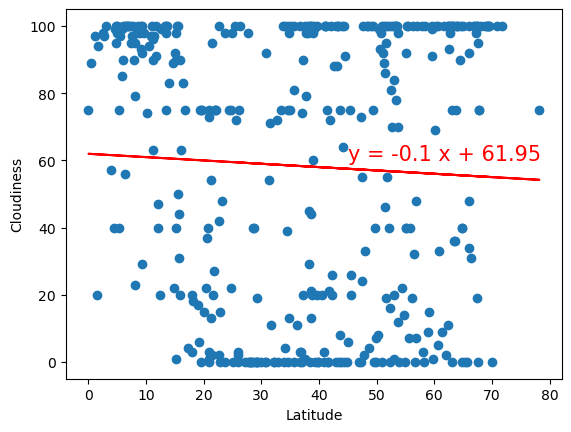

In [19]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Cloudiness"]
linear_regression(x, y, "Cloudiness", (45,60))

The r-squared is: 0.13517808263196732


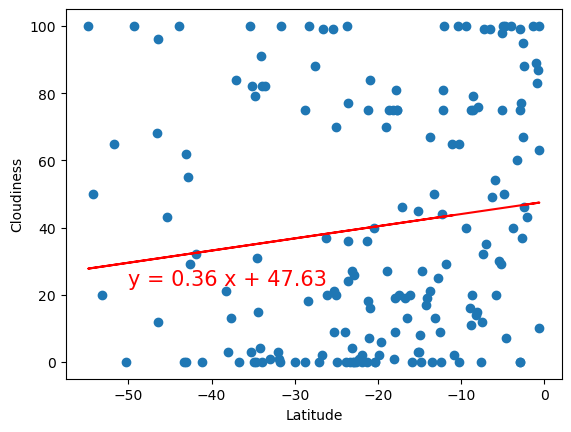

In [20]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Cloudiness"]
linear_regression(x, y, 'Cloudiness', (-50,23))

**Linear relationship:** 

In the northern hemisphere, there is a weak negative correlation, where cloudiness decreases as latitude increases.

Likewise in the southern hemisphere, there is a weak negative correlation where as latitude increases, cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.0007407690587078328


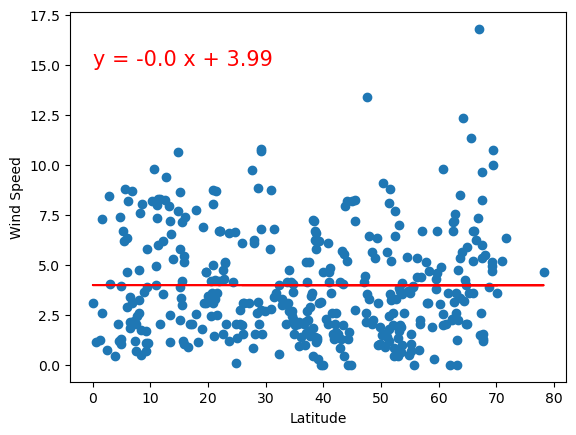

In [21]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Wind Speed"]
linear_regression(x, y, "Wind Speed", (0,15))

The r-squared is: -0.1994874946608193


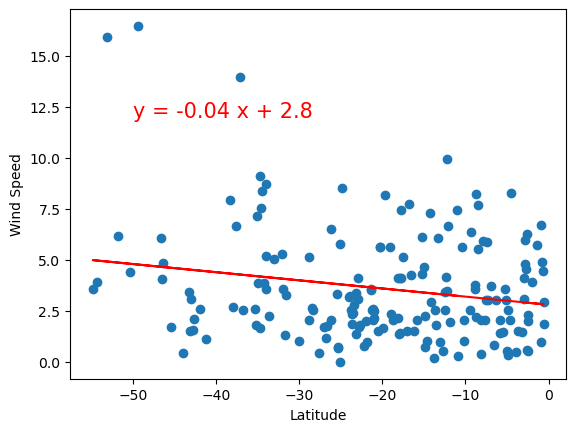

In [22]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Wind Speed"]
linear_regression(x, y, 'Wind Speed', (-50,12))

**Discussion about the linear relationship:** 

In both hemispheres the correlation shows a negative, almost non-existent relationship between wind speed and latitude. 